In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
# Reading File CSV
df = pd.read_csv('output.csv')

In [4]:
# Splitting Data into Class and Feature
X = df.drop('class', axis=1) # Feature
y = df['class'] # Class

In [2]:
# Import Model for Testing
import pickle
with open(r'E:\Program Skripsi\rf100.pkl', 'rb') as f:
            model = pickle.load(f)

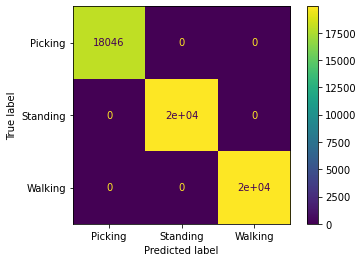

In [5]:
from sklearn.metrics import confusion_matrix # Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # Confusion matrix display
yhat = model.predict(X)
cm = confusion_matrix(y, yhat, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot()

In [5]:
# Splitting Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1234) #1234

In [6]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [7]:
# Pipeline for Algorithm Methods
pipelines = {
    'lr': make_pipeline(StandardScaler(), LogisticRegression()),
    'rc': make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42)),
    'gbc':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'mlp':make_pipeline(StandardScaler(), MLPClassifier(random_state=1)),
    'knn':make_pipeline(StandardScaler(), KNeighborsClassifier()),
}

In [8]:
# Training Algorithm
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

d:\App\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Save Model
import pickle
with open('KNN.pkl', 'wb') as f:
    pickle.dump(fit_models['knn'], f)

In [9]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
from sklearn.metrics import precision_score # Precision metrics
from sklearn.metrics import recall_score # Recall metrics
from sklearn.metrics import f1_score # F1 metrics
from sklearn.metrics import confusion_matrix # Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # Confusion matrix display
from sklearn.metrics import classification_report # Classification report
from sklearn.metrics import mean_absolute_error # Mean absolute error
from sklearn.metrics import mean_squared_error # Mean squared error

lr
rc
rf
gbc
mlp
knn


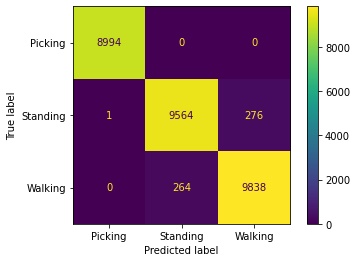

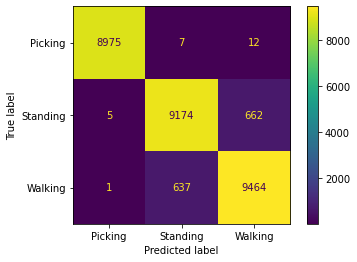

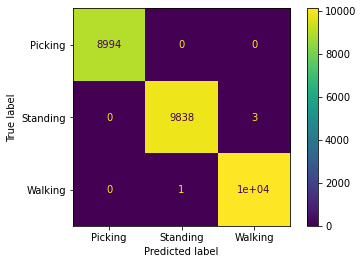

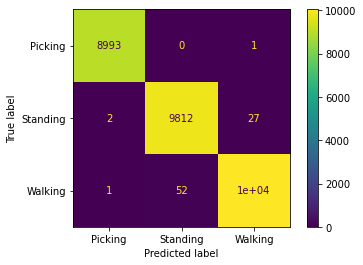

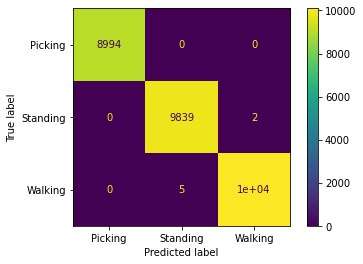

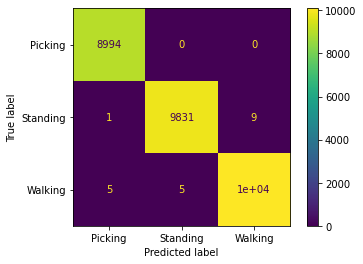

In [10]:
# Confusion matrix display
for algo, model in fit_models.items():
    yhat = model.predict(X_test)    
    print(algo)
    cm = confusion_matrix(y_test, yhat, labels=model.classes_)
    disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    disp.plot()

In [11]:
# MAE, MSE, RMSE
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    ytest = pd.factorize(y_test)[0]
    ypred = pd.factorize(yhat)[0]
    print(algo)
    # Mean absolute error
    print(mean_absolute_error(ytest, ypred))
    # Mean squared error
    print(mean_squared_error(ytest, ypred))

lr
0.01869578740021426
0.01869578740021426
rc
0.04620382209627812
0.047102325742129456
rf
0.00013823133013097418
0.00013823133013097418
gbc
0.0029374157652832015
0.0030756470954141756
mlp
0.00024190482772920482
0.00024190482772920482
knn
0.0008639458133185887
0.0012095241386460241


In [12]:
# Classification Report
for algo, model in fit_models.items():
    yhat = model.predict(X_test) 
    print(algo)
    print(classification_report(y_test, yhat))

lr
              precision    recall  f1-score   support

     Picking       1.00      1.00      1.00      8994
    Standing       0.97      0.97      0.97      9841
     Walking       0.97      0.97      0.97     10102

    accuracy                           0.98     28937
   macro avg       0.98      0.98      0.98     28937
weighted avg       0.98      0.98      0.98     28937

rc
              precision    recall  f1-score   support

     Picking       1.00      1.00      1.00      8994
    Standing       0.93      0.93      0.93      9841
     Walking       0.93      0.94      0.94     10102

    accuracy                           0.95     28937
   macro avg       0.96      0.96      0.96     28937
weighted avg       0.95      0.95      0.95     28937

rf
              precision    recall  f1-score   support

     Picking       1.00      1.00      1.00      8994
    Standing       1.00      1.00      1.00      9841
     Walking       1.00      1.00      1.00     10102

    accurac

In [13]:
# Accuracy metrics
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.9813042125997857
rc 0.9542454297266475
rf 0.999861768669869
gbc 0.9971316998997822
mlp 0.9997580951722708
knn 0.9993088433493451


In [14]:
# Precision metrics
for algo, model in fit_models.items():
    yhat = model.predict(X_test)    
    print(algo, precision_score(y_test, yhat, average='macro'))

lr 0.9819126312659567
rc 0.9557518582402079
rf 0.9998671505136096
gbc 0.9972054062188178
mlp 0.999764678993956
knn 0.9993113319066959


In [15]:
# Recall metrics
for algo, model in fit_models.items():
    yhat = model.predict(X_test)    
    print(algo, recall_score(y_test, yhat, average='macro'))
    

lr 0.9819063383653049
rc 0.9556513349801931
rf 0.9998653875442206
gbc 0.9972318246422004
mlp 0.9997672723754406
knn 0.9993313133719561


In [16]:
# F1 Score metrics
for algo, model in fit_models.items():
    yhat = model.predict(X_test)    
    print(algo, f1_score(y_test, yhat, average='macro'))

lr 0.9819092278652534
rc 0.9557000104823126
rf 0.9998662623219324
gbc 0.9972176494652206
mlp 0.9997659605965549
knn 0.9993212632675327
